In [1]:
from roulette import Roulette
from collections import Counter
import random
from simulations_core import *
from simulations_plots_core import *

roulette = Roulette()

In [2]:
def andrucci_betting(goal_money_won, bet, money_limit):
    watch_bets = random.randint(30,37)
    numbers_chosen = [roulette.spin() for _ in range(watch_bets)]
    counts = Counter(numbers_chosen)
    sorted = counts.most_common()
    play_on = random.randint(0,len(sorted)//2)
    money = 0
    money_history = [money]

    while money < goal_money_won:
        money += roulette.make_specific_single_bet(bet, play_on)
        money_history.append(money)
        
        if money < money_limit:
            return money_history

    return money_history

In [3]:
money_goals = [10, 100, 500, 1000]

In [4]:
bet = 1
money_histories = simulate_different_goal_money(
                    betting_type = andrucci_betting, 
                    goal_money_list = money_goals, 
                    number_histories = 10000,
                    start_bet= bet,
                    money_limit=-35*bet)


In [5]:
successful_histories = get_successful_histories(money_histories, money_goals)

## Analysis when the goal is to win 10 units

In [6]:
len(successful_histories[10])

5883

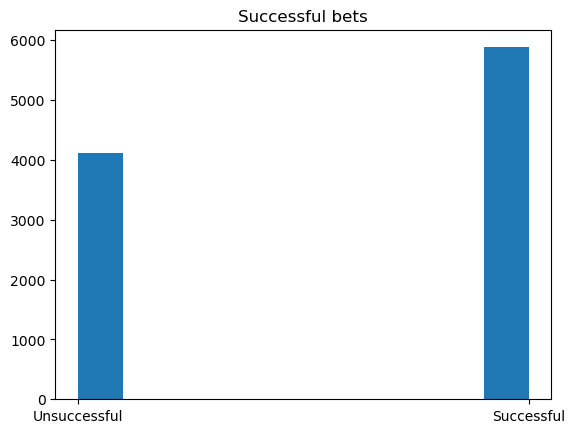

In [7]:
plot_successful_bets(money_histories[10], 10)

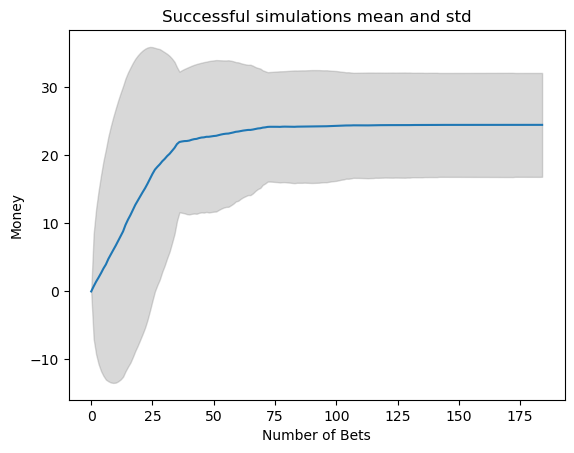

In [8]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, 10)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Successful simulations mean and std')

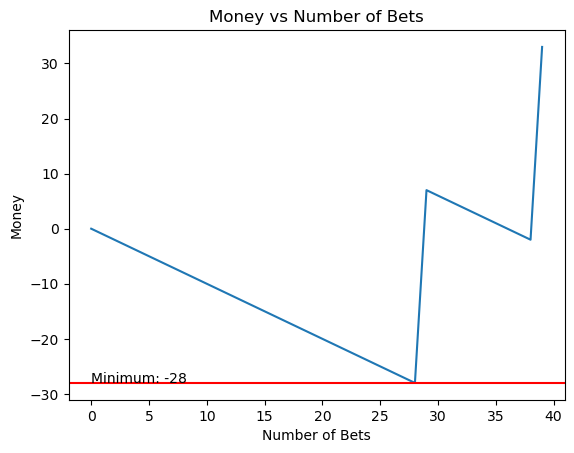

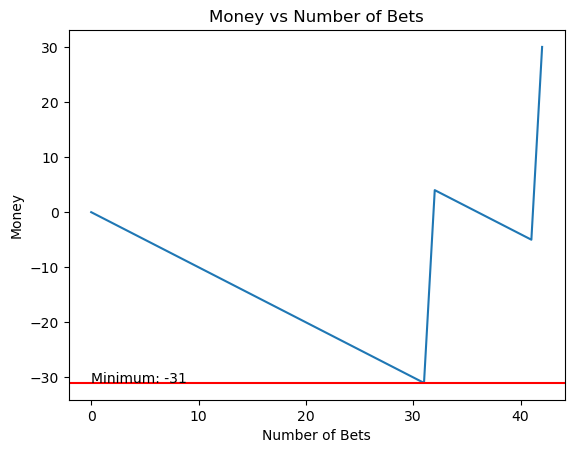

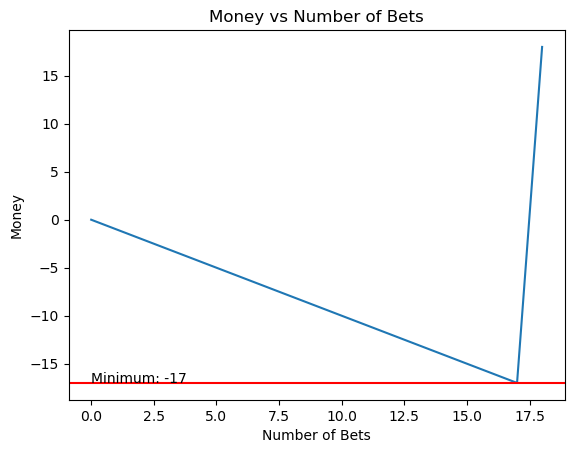

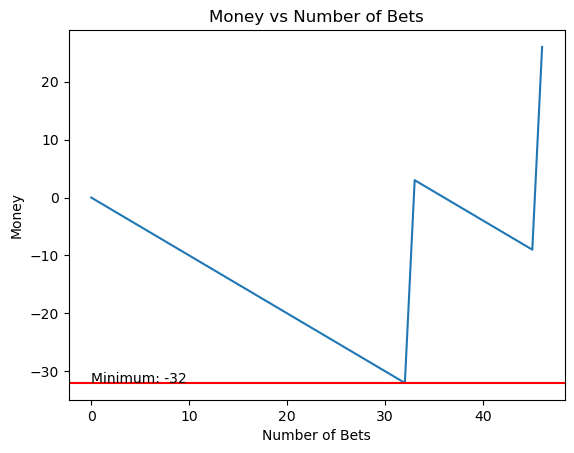

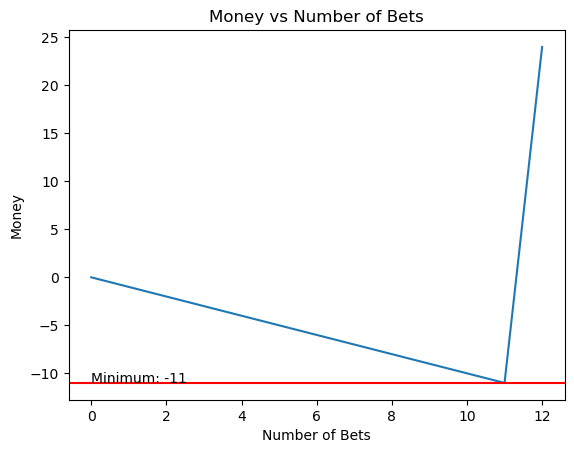

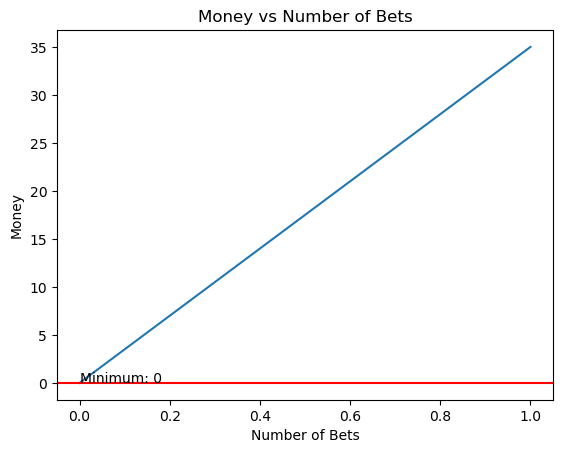

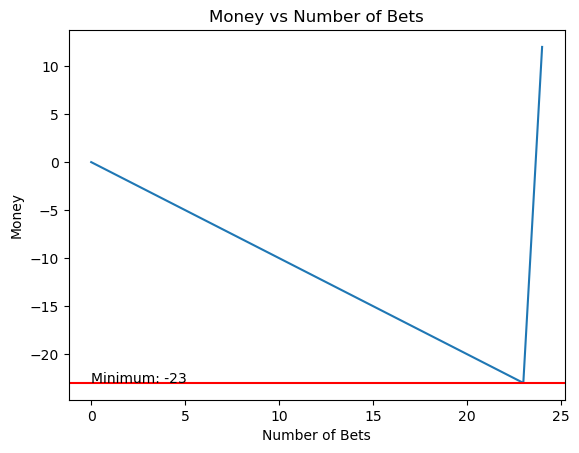

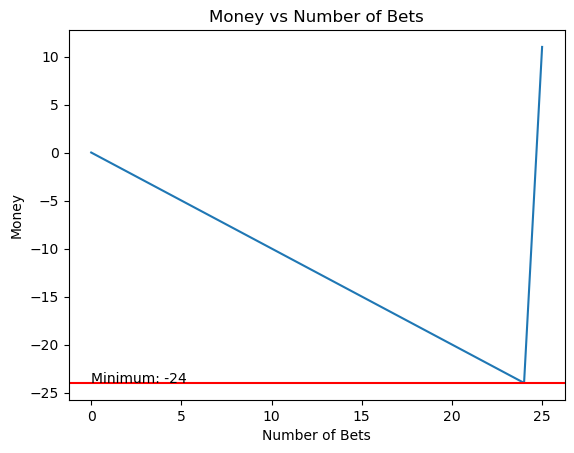

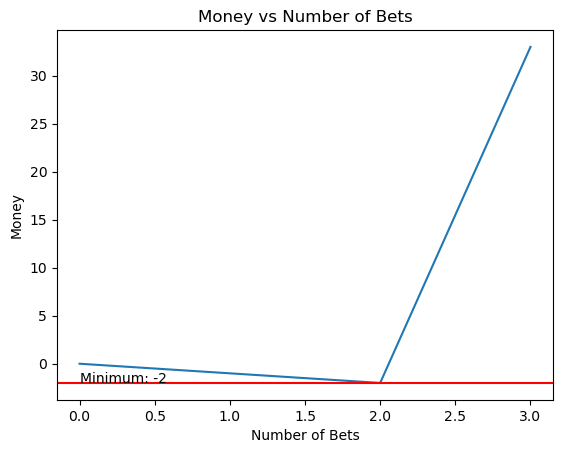

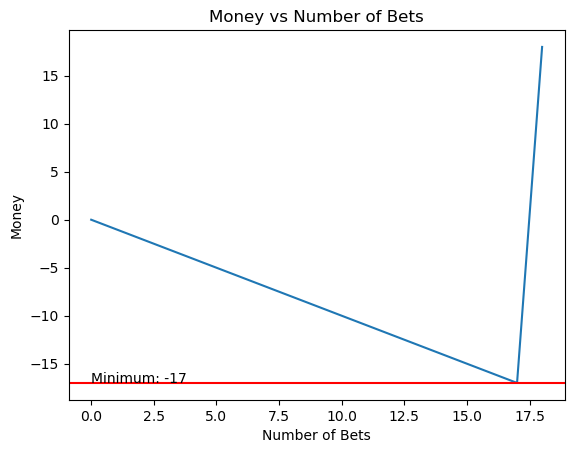

In [9]:
plot_money_histories(successful_histories, 10)

## Analysis when the goal is to win 100 units

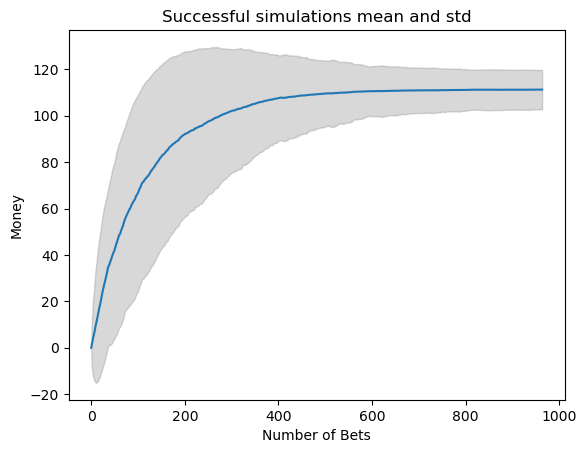

In [10]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, 100)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Successful simulations mean and std')

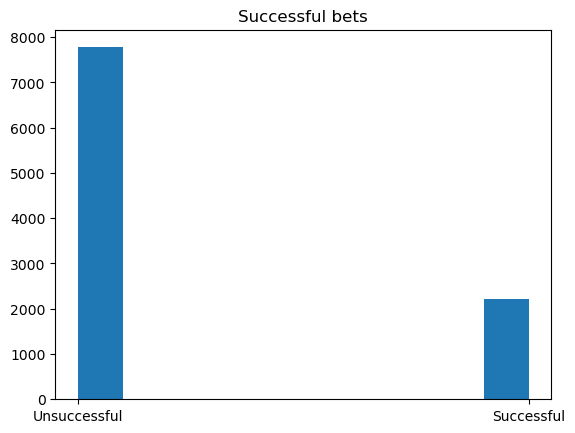

In [11]:
plot_successful_bets(money_histories[100], 100)

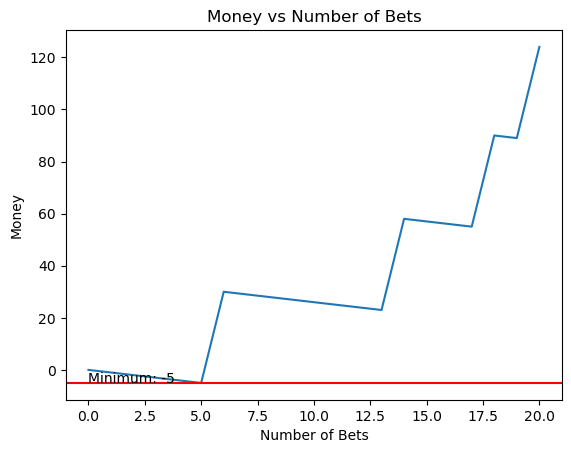

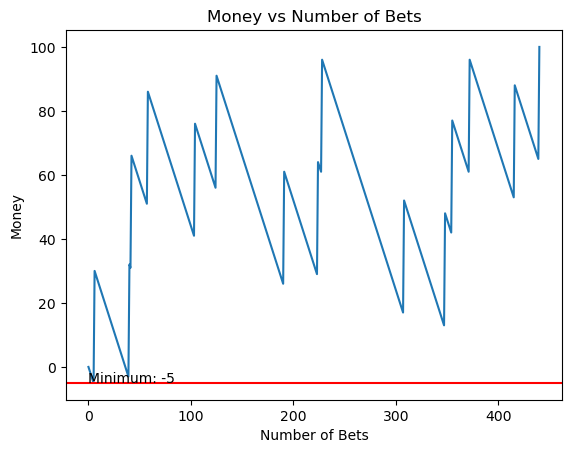

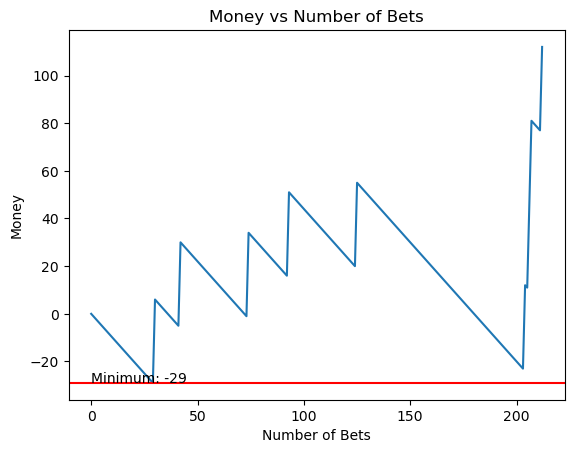

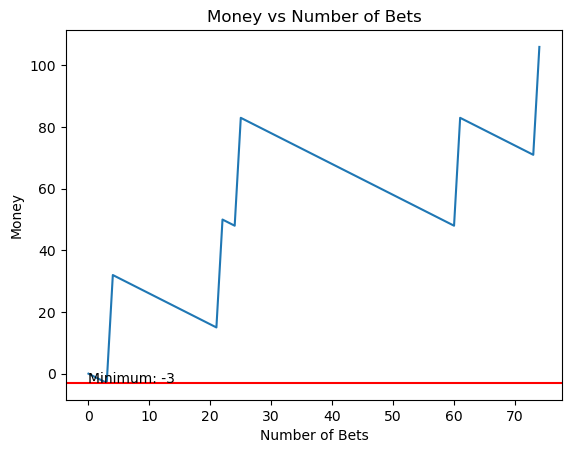

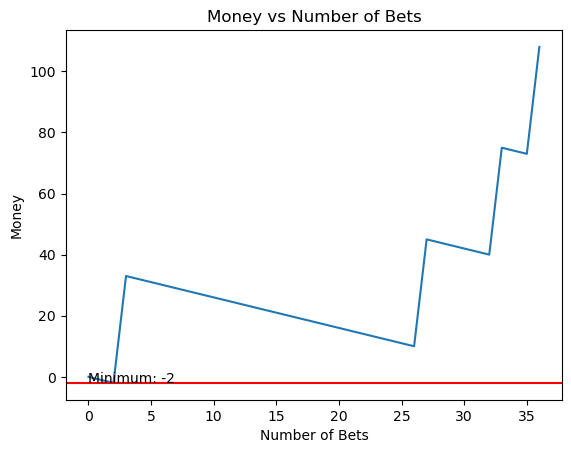

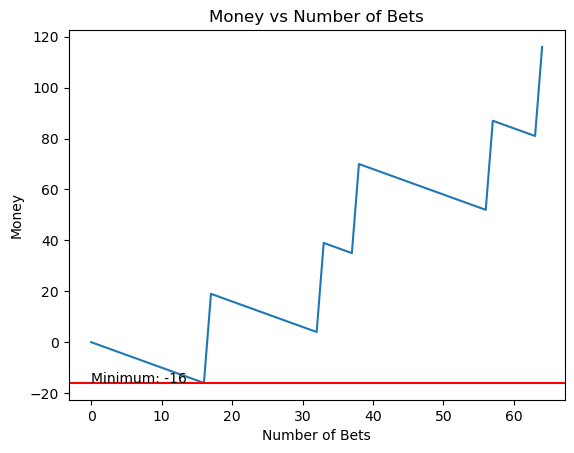

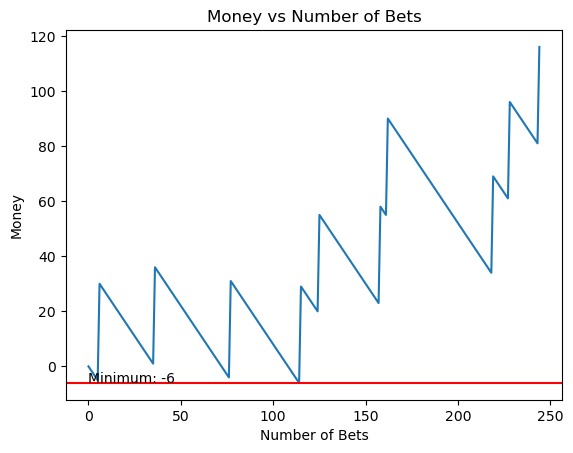

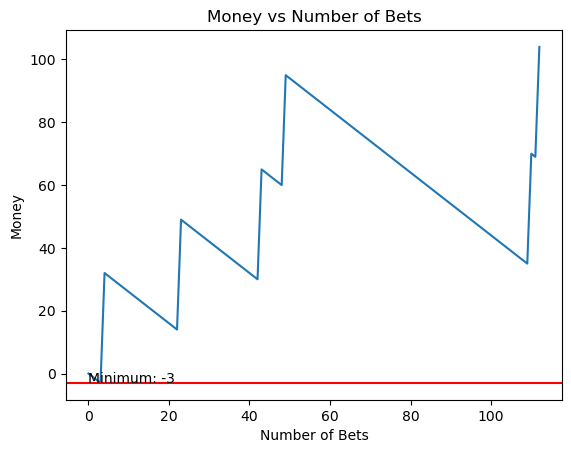

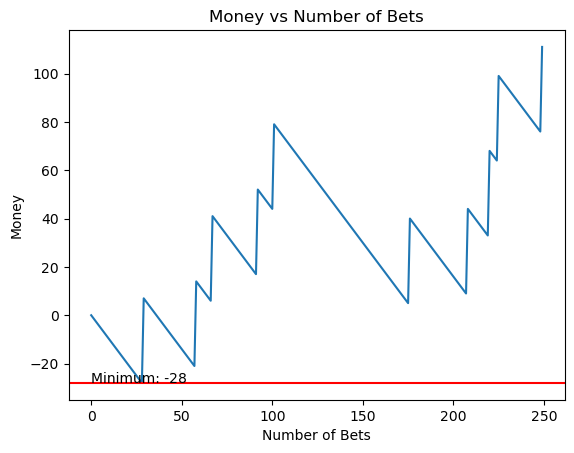

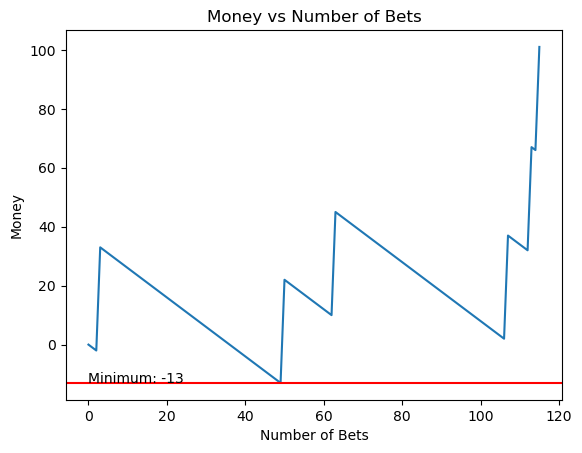

In [12]:
plot_money_histories(successful_histories, 100)

## Analysis when the goal is to win 500 units

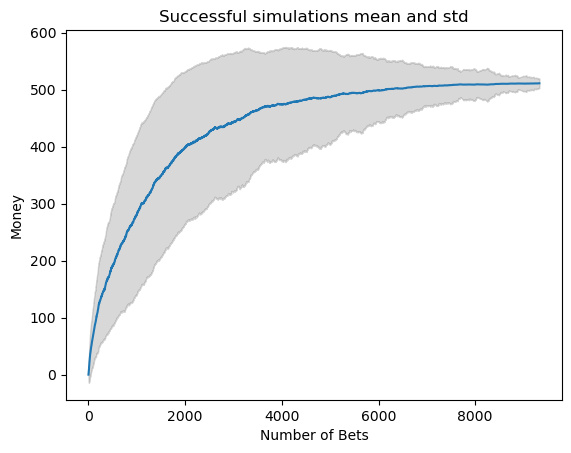

In [13]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, 500)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Successful simulations mean and std')

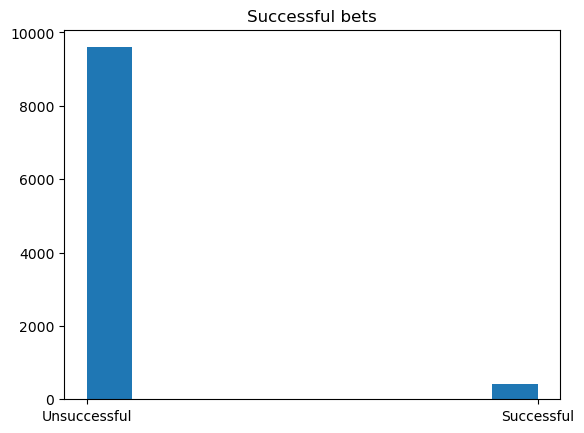

In [14]:
plot_successful_bets(money_histories[500], 500)

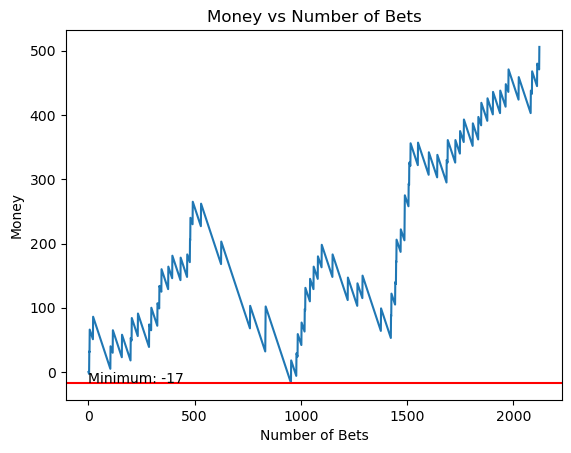

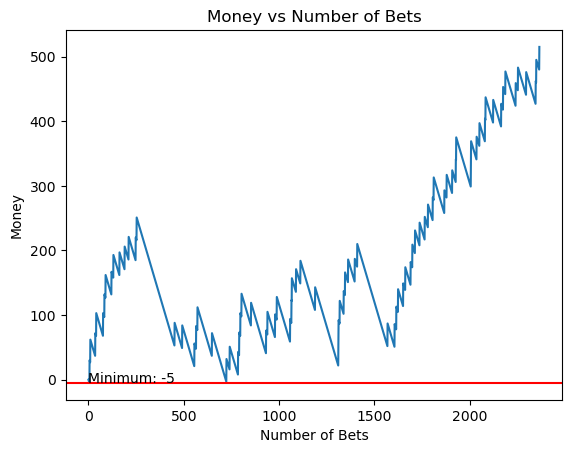

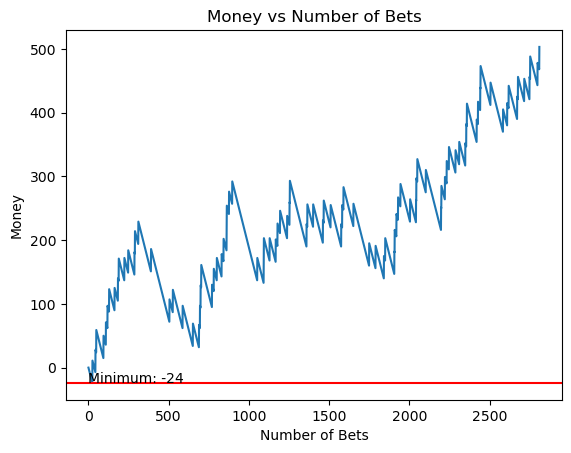

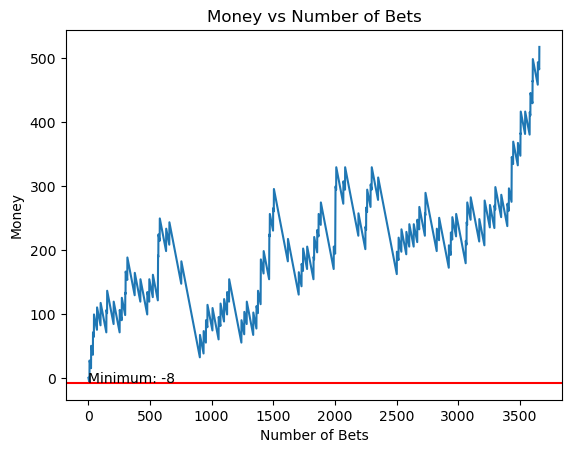

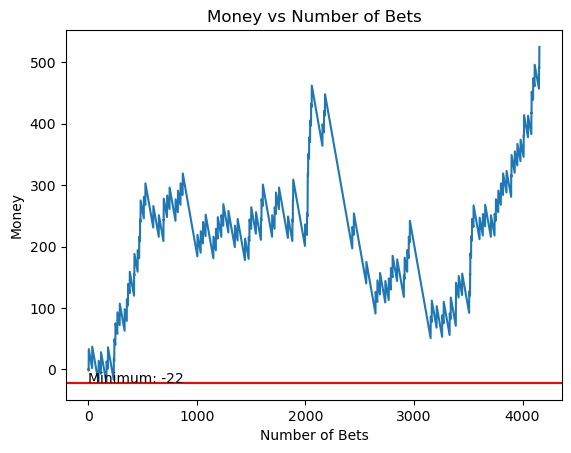

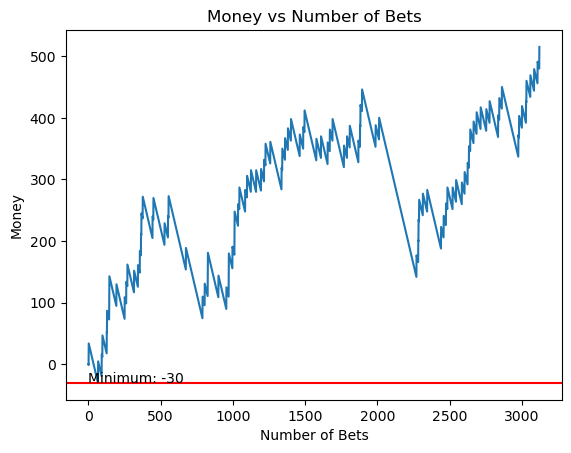

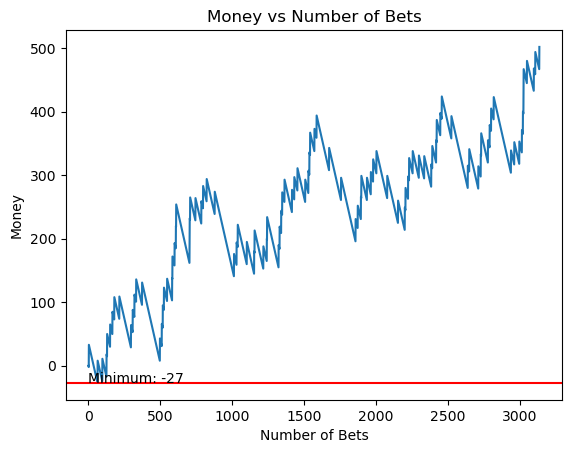

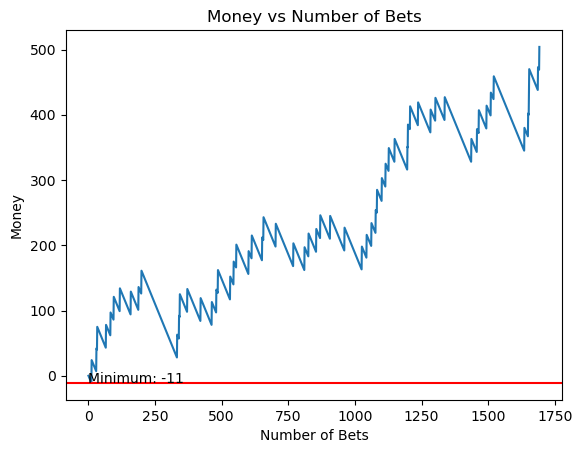

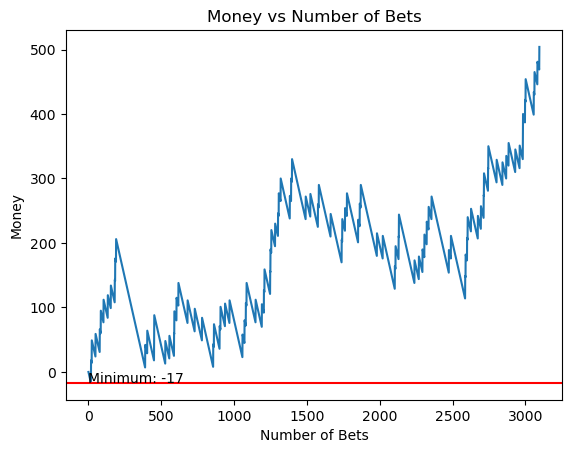

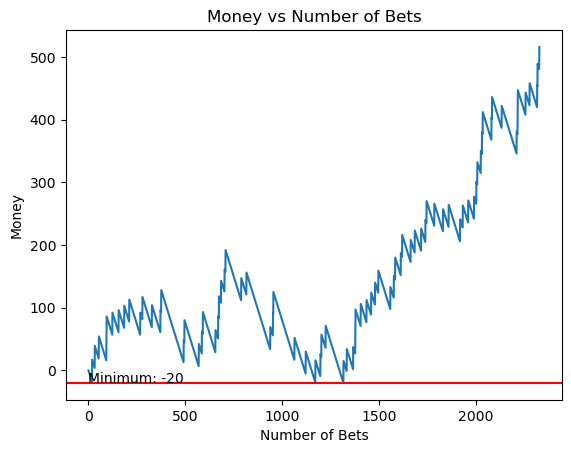

In [15]:
plot_money_histories(successful_histories, 500)

## Analysis when the goal is to win 1000 units

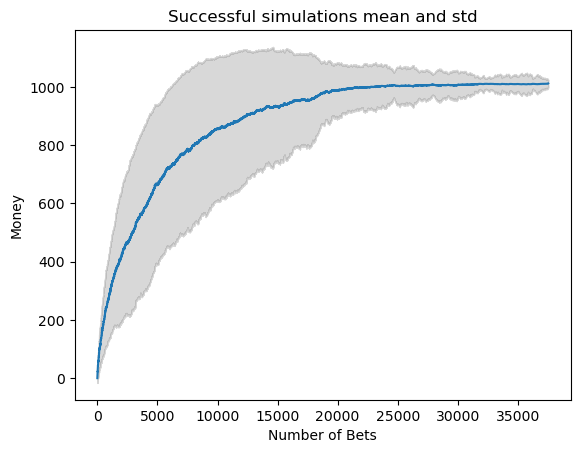

In [16]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, 1000)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Successful simulations mean and std')

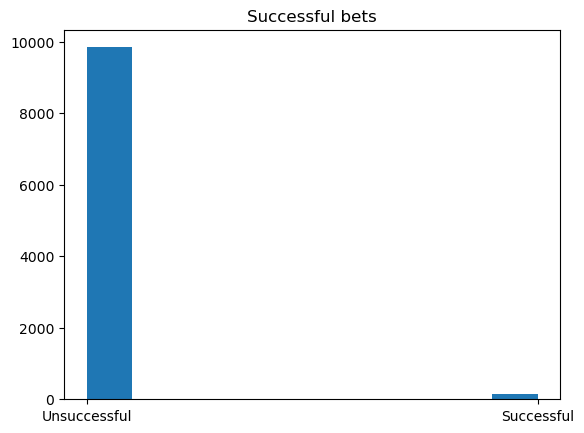

In [17]:
plot_successful_bets(money_histories[1000], 1000)

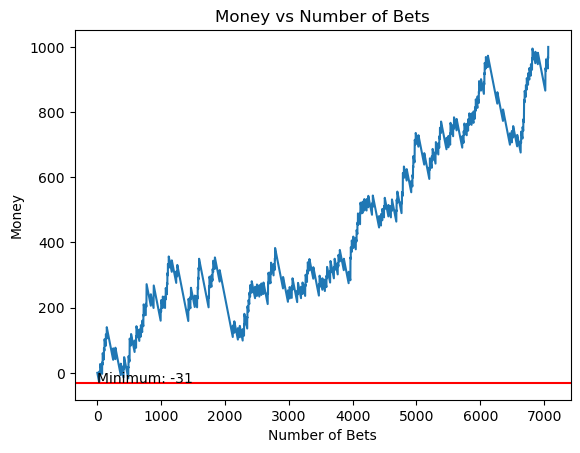

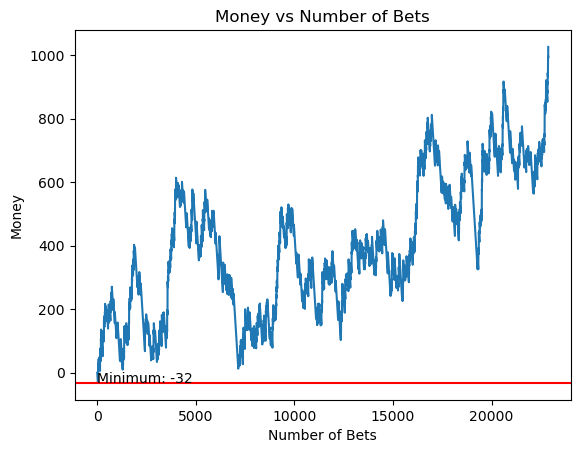

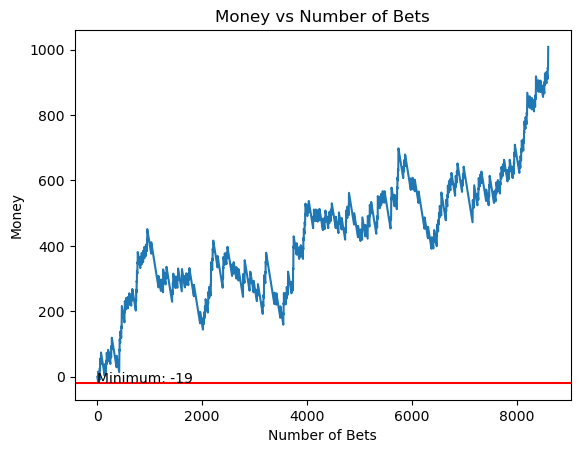

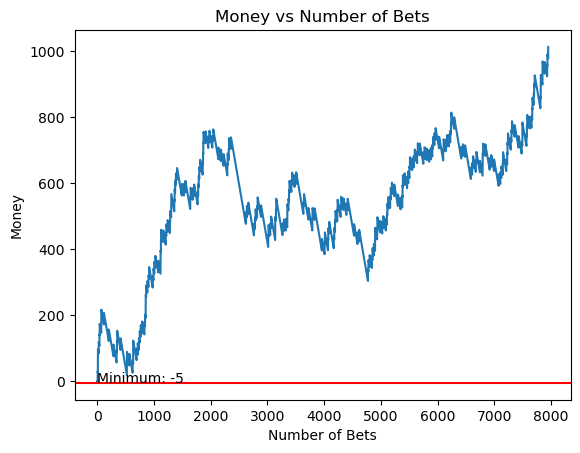

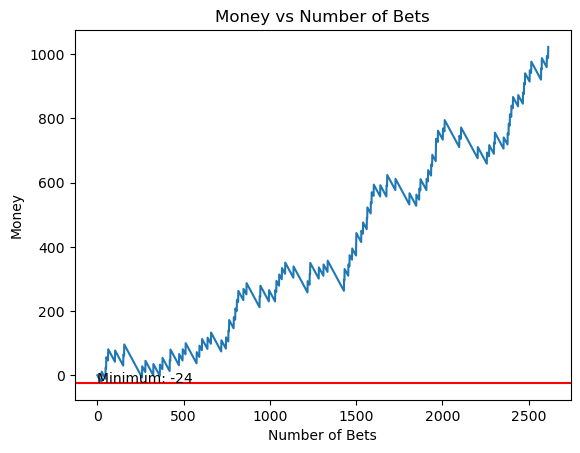

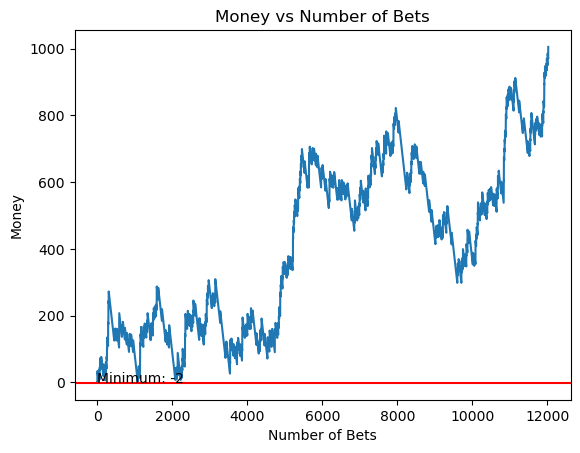

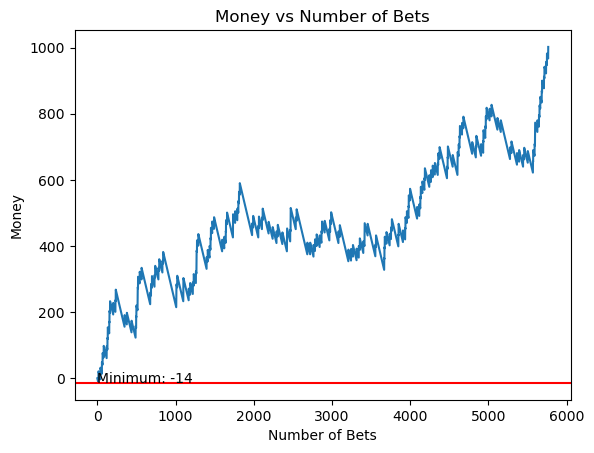

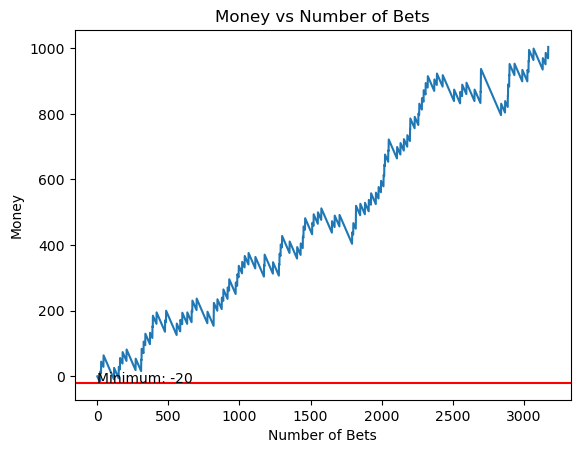

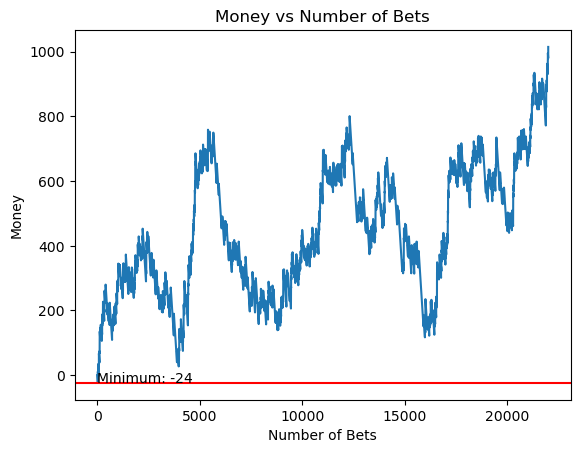

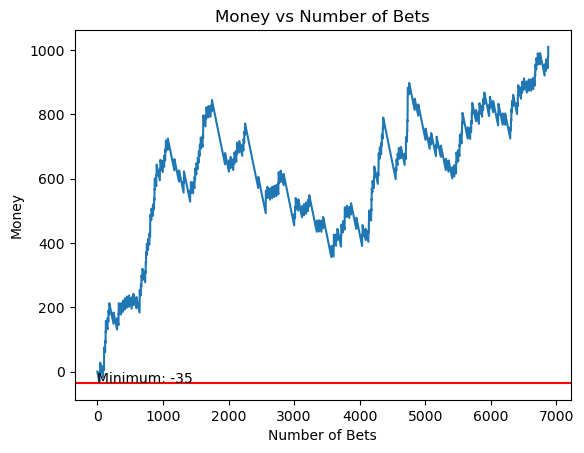

In [18]:
plot_money_histories(successful_histories, 1000)